In [222]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch


torch.manual_seed(1234)

# Import Dataset from CSV File in Data Folder
data=pd.read_csv('Car details v3.csv')
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [223]:
# Analyze Data
data.info()
data.describe()
data.columns
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [224]:
# Show all unique names
data['name'].unique()

array(['Maruti Swift Dzire VDI', 'Skoda Rapid 1.5 TDI Ambition',
       'Honda City 2017-2020 EXi', ..., 'Tata Nexon 1.5 Revotorq XT',
       'Ford Freestyle Titanium Plus Diesel BSIV',
       'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV'], dtype=object)

In [225]:
def convert_col_to_numerical(data, col):
    unique_vals = data[col].unique()
    val_dict = {}
    count = 0
    for val in unique_vals:
        val_dict[val] = count
        count += 1
    data[col] = data[col].replace(val_dict)
    return data

In [226]:
# Get rid of torque
data = data.drop('torque', axis=1)

# Edit every name in name column to be just 2 words
data['manufacturer'] = data['name'].str.split(' ').str[0]
data['model'] = data['name'].str.split(' ').str[1]
data = data.drop('name', axis=1)

# Convert categorical columns to numerical
data = convert_col_to_numerical(data, 'manufacturer')
data = convert_col_to_numerical(data, 'model')
data = convert_col_to_numerical(data, 'fuel')
data = convert_col_to_numerical(data, 'seller_type')
data = convert_col_to_numerical(data, 'transmission')
data = convert_col_to_numerical(data, 'owner')

# Edit every numerical column to be just the number
data['mileage'] = data['mileage'].str.split(' ').str[0]
data['engine'] = data['engine'].str.split(' ').str[0]
data['max_power'] = data['max_power'].str.split(' ').str[0]

# Convert numerical columns to numerical
data['mileage'] = pd.to_numeric(data['mileage'])
data['engine'] = pd.to_numeric(data['engine'])
data['max_power'] = pd.to_numeric(data['max_power'])


In [227]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,manufacturer,model
0,2014,450000,145500,0,0,0,0,23.40,1248.0,74.00,5.0,0,0
1,2014,370000,120000,0,0,0,1,21.14,1498.0,103.52,5.0,1,1
2,2006,158000,140000,1,0,0,2,17.70,1497.0,78.00,5.0,2,2
3,2010,225000,127000,0,0,0,0,23.00,1396.0,90.00,5.0,3,3
4,2007,130000,120000,1,0,0,0,16.10,1298.0,88.20,5.0,0,0


In [228]:
# What are the datatypes
data.dtypes


year               int64
selling_price      int64
km_driven          int64
fuel               int64
seller_type        int64
transmission       int64
owner              int64
mileage          float64
engine           float64
max_power        float64
seats            float64
manufacturer       int64
model              int64
dtype: object

In [229]:
# Convert dataset to all floats
data = data.astype(float)

In [230]:
# Analyse the NAN values
data.isnull().sum()

# fill null values with mean
data['mileage'] = data['mileage'].fillna(data['mileage'].mean())
data['engine'] = data['engine'].fillna(data['engine'].mean())
data['max_power'] = data['max_power'].fillna(data['max_power'].mean())
data['seats'] = data['seats'].fillna(data['seats'].mean())


In [231]:
# Analyse the Correlation between the columns
corr_matrix = data.corr()
corr_matrix['selling_price'].sort_values(ascending=False)


selling_price    1.000000
max_power        0.744958
transmission     0.588845
manufacturer     0.501616
engine           0.453567
year             0.414092
seller_type      0.323047
model            0.131749
seats            0.041161
mileage         -0.125454
fuel            -0.202916
owner           -0.221915
km_driven       -0.225534
Name: selling_price, dtype: float64

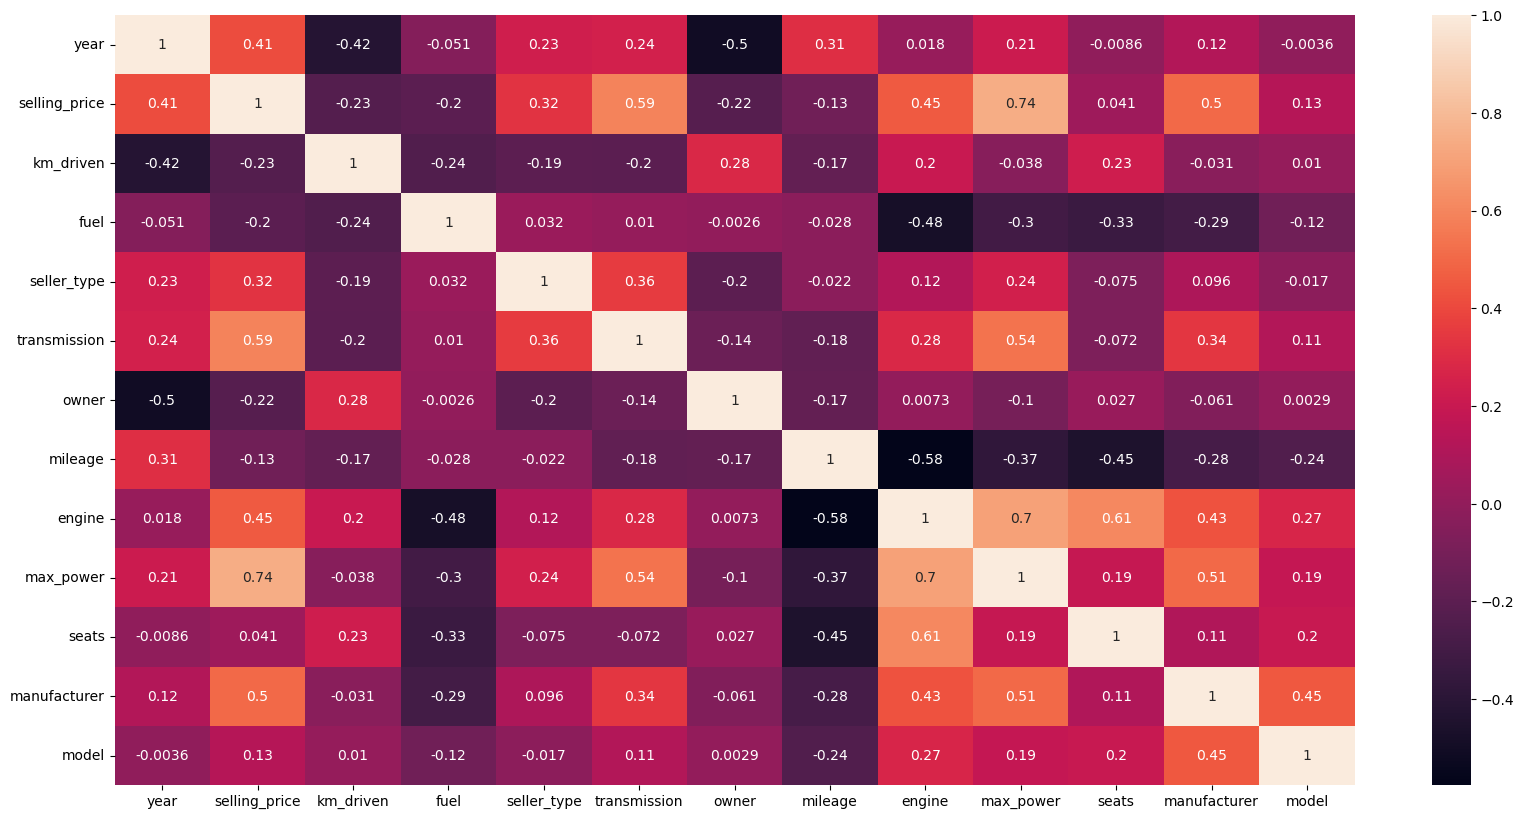

In [232]:
# Analyse the Correlation between the columns using a heatmap
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True)
plt.show()


In [233]:
y=np.log(data["selling_price"])
X=data.drop("selling_price",axis=1)

scaler=StandardScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)

X=pd.DataFrame(X_scaled,columns=X.columns)
X.head()

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train_tensor=torch.tensor(X_train.values, dtype=torch.float)

In [234]:
# # Split the data into training and testing data
# train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

# # Split the training data into X and y
# X_train = train_set.drop('selling_price', axis=1)
# y_train = train_set['selling_price']

# # Split the testing data into X and y
# X_test = test_set.drop('selling_price', axis=1)
# y_test = test_set['selling_price']

In [235]:
# # Scale the data
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)

# # # Convert the data into a tensor
# # X_train = torch.Tensor(X_train)
# # y_train = torch.Tensor(y_train.values)
# # X_test = torch.Tensor(X_test)
# # y_test = torch.Tensor(y_test.values)

In [236]:
class MyModel(torch.nn.Module):    # erbt von torch.nn.Module
    def __init__(self):             # Konstruktor
        super(MyModel, self).__init__()   # Aufruf des Super-Konstruktors
        self.fc1 = torch.nn.Linear(12, 10)    # Fully-Connected-Layer mit 12 Eingangsneuronen und 10 Ausgangsneuronen
        self.fc2 = torch.nn.Linear(10, 1)     # Fully-Connected-Layer mit 10 Eingangsneuronen und 1 Ausgangsneuronen
        self.batch_norm = torch.nn.BatchNorm1d(10)  # Batch-Normalization-Layer mit 10 Neuronen
        self.relu=torch.nn.ReLU()   # ReLU-Aktivierungsfunktion

    def forward(self, xb):
        xb = self.relu(self.fc1(xb))   # a2
        xb = self.batch_norm(xb)  # a2_norm=a2-mean/std
        xb = self.fc2(xb)
        return xb

In [237]:


def root_mean_squared_error(y_hat,y):
    return torch.sqrt(torch.mean((y_hat-y)**2))



In [238]:
#dataset class
class Dataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X.values, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.float32)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, index):
        return self.X[index], self.y[index]
    
train_dataset = Dataset(X_train, y_train)


0
300


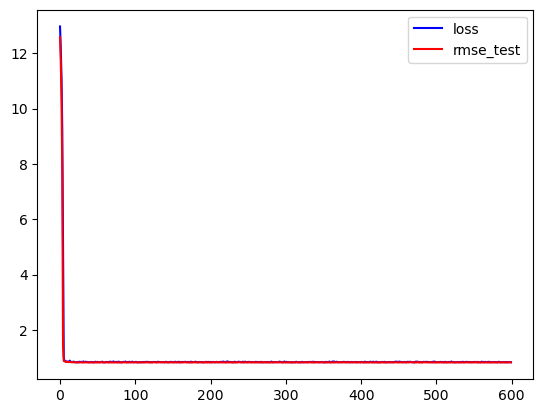

600


In [239]:
# Define Dataset class
class MyDataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X.values, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.float32)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, index):
        return self.X[index], self.y[index]

# Create instances of the Dataset class
train_dataset = MyDataset(X_train, y_train)

lr = 0.001
wd = 0.1
torch.manual_seed(1234)

batch_size = 100
epochs = 600
losses = []
rmse_test = []
MyModel = MyModel()
optimizer = torch.optim.SGD(MyModel.parameters(), lr=lr, weight_decay=wd, momentum=0.9)

# Create DataLoader for training dataset
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Convert test data to tensors
x_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

for i in range(epochs):
    losses_in_epoch = []
    if i % 300 == 0:
        print(i)
    for xb, yb in train_dataloader:
        y_hat = MyModel(xb)
        loss = root_mean_squared_error(y_hat, yb)
        losses_in_epoch.append(loss.item())
        loss.backward()
        with torch.no_grad():
            optimizer.step()
            optimizer.zero_grad()

    losses.append(sum(losses_in_epoch) / len(losses_in_epoch))
    y_test_hat = MyModel(x_test_tensor)
    y_test_rmse = root_mean_squared_error(y_test_hat, y_test_tensor)
    rmse_test.append(y_test_rmse.item())

plt.plot(range(epochs), losses, color="blue")
plt.plot(range(epochs), rmse_test, color="red")
plt.legend(["loss", "rmse_test"])
plt.show()
# Print epochs
print(epochs)


In [240]:
# print the lowest rmse and loss
print(min(rmse_test))
print(min(losses))

0.8277045488357544
0.8310335078982242
